# Korean Word2Vec

> # 네이버 영화 리뷰 데이터

# 1. Install & Import Packages

- Install KoNLPy

In [1]:
!pip install konlpy

     |████████████████████████████████| 19.4MB 1.4MB/s 
     |████████████████████████████████| 92kB 7.2MB/s 
     |████████████████████████████████| 460kB 43.1MB/s 
  Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3


- Import Packages

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# 2. Data Preprocessing

> ## 1) naverRatings.zip

- Google Drive Mount

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
!ls -l /content/drive/My\ Drive/Colab\ Notebooks/datasets/naverRatings.zip

-rw------- 1 root root 7903524 Mar 31 02:14 '/content/drive/My Drive/Colab Notebooks/datasets/naverRatings.zip'


In [5]:
!unzip /content/drive/My\ Drive/Colab\ Notebooks/datasets/naverRatings.zip

Archive:  /content/drive/My Drive/Colab Notebooks/datasets/naverRatings.zip
  inflating: naverRatings.txt        


In [6]:
!ls -l naverRatings.txt

-rw-r--r-- 1 root root 19515078 May  4  2020 naverRatings.txt


> ## 2) 데이터 읽어오기

- Label : '1'(긍정), '0'(부정)

In [7]:
train_data = pd.read_table('naverRatings.txt')
train_data[:20]

,id,document,label
0,8112052,어릴때보고 지금다시봐도 재밌어요ㅋㅋ,1
1,8132799,"디자인을 배우는 학생으로, 외국디자이너와 그들이 일군 전통을 통해 발전해가는 문화산...",1
2,4655635,폴리스스토리 시리즈는 1부터 뉴까지 버릴께 하나도 없음.. 최고.,1
3,9251303,와.. 연기가 진짜 개쩔구나.. 지루할거라고 생각했는데 몰입해서 봤다.. 그래 이런...,1
4,10067386,안개 자욱한 밤하늘에 떠 있는 초승달 같은 영화.,1
5,2190435,사랑을 해본사람이라면 처음부터 끝까지 웃을수 있는영화,1
6,9279041,완전 감동입니다 다시봐도 감동,1
7,7865729,개들의 전쟁2 나오나요? 나오면 1빠로 보고 싶음,1
8,7477618,굿,1
9,9250537,바보가 아니라 병 쉰 인듯,1


In [8]:
print(len(train_data))

200000


> ## 3) 데이터 정제(Cleaning)

- NULL 값 존재 확인

In [9]:
print(train_data.isnull().values.any())

True


- NULL값 존재 행 제거 후 재확인

In [10]:
train_data = train_data.dropna(how = 'any')
print(train_data.isnull().values.any())

False


- NULL값 제거 후 데이터 개수

In [11]:
print(len(train_data))

199992


> ## 4) 정규표현식을 통한 한글 외 문자 제거

In [12]:
train_data['document'] = train_data['document'].str.replace('[^ㄱ-ㅎㅏ-ㅣ가-힣 ]', '')
# replace('찾을 값','바꿀 값') 
# 정규표현식 : ^ = 일치하지 않는 // ㄱ-ㅎ = 한글 자음 // ㅏ-ㅣ = 한글 모음 // 가-힣 = 한글
# 즉, 한글(자음, 모음, 자음+모음)이 아닌 것은 공백으로 대체한다. 

- 처리 결과 확인

In [13]:
train_data[:20]
# ., 숫자, 문장부호가 사라진다

,id,document,label
0,8112052,어릴때보고 지금다시봐도 재밌어요ㅋㅋ,1
1,8132799,디자인을 배우는 학생으로 외국디자이너와 그들이 일군 전통을 통해 발전해가는 문화산업...,1
2,4655635,폴리스스토리 시리즈는 부터 뉴까지 버릴께 하나도 없음 최고,1
3,9251303,와 연기가 진짜 개쩔구나 지루할거라고 생각했는데 몰입해서 봤다 그래 이런게 진짜 영화지,1
4,10067386,안개 자욱한 밤하늘에 떠 있는 초승달 같은 영화,1
5,2190435,사랑을 해본사람이라면 처음부터 끝까지 웃을수 있는영화,1
6,9279041,완전 감동입니다 다시봐도 감동,1
7,7865729,개들의 전쟁 나오나요 나오면 빠로 보고 싶음,1
8,7477618,굿,1
9,9250537,바보가 아니라 병 쉰 인듯,1


In [14]:
train_data['document'].shape

(199992,)

> ## 5) 불용어(Stopword) 지정

In [15]:
stopwords = ['의', '가', '이', '은', '들', '는', '좀', '잘', '강',\
             '과', '도', '를', '으로', '자', '에', '와', '한', '하다']
# 큰 의미가 없는 단어로 지정정

> ## 6) Okt( )를 활용한 토큰화 및 불용어 제거

- 7분 소요

In [16]:
%%time

from konlpy.tag import Okt

okt = Okt()
tokenized_data = []

for sentence in train_data['document']:
    temp_X = okt.morphs(sentence,                                # 각 문장을 어간이 살아 있는 형태소 단위로 쪼개고,
                        stem = True)
    temp_X = [word for word in temp_X if not word in stopwords]  # 쪼갠 단어가 불용어가 아니라면, 
    tokenized_data.append(temp_X)                                # tokenized_data에 추가된다.

# okt.morhps : 형태소 단위로 나눔 / stem = True : 어간 추출 

CPU times: user 8min 7s, sys: 1.96 s, total: 8min 9s
Wall time: 7min 58s


# 3. 리뷰 데이터 분포 시각화


> ## 1) 리뷰 길이 확인

In [17]:
print('리뷰의 최대 길이 :', max(len(l) for l in tokenized_data))
print('리뷰의 평균 길이 :', sum(map(len, tokenized_data))/len(tokenized_data))

리뷰의 최대 길이 : 72
리뷰의 평균 길이 : 10.719648785951438


> ## 2) 리뷰 길이 시각화

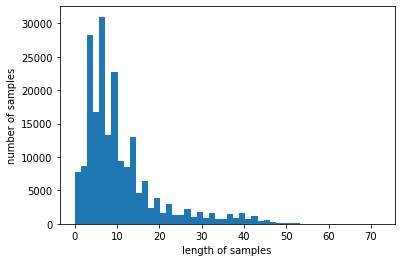

In [18]:
plt.hist([len(s) for s in tokenized_data], bins = 50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()
# 오른쪽 꼬리가 긴(왜도 > 0) 정규분포 형태

In [34]:
import numpy as np

print(np.asarray(tokenized_data).shape)

(199992,)


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


# 4. Word2Vec 수행

> ## 1) 임베딩 학습

- Vector 차원 : 100
- Window 크기 : 5
- size = 워드 벡터의 특징 값. 즉, 임베딩 된 벡터의 차원
- min_count = 단어 최소 빈도 수 제한 (빈도가 적은 단어들은 학습하지 않는다.)
- workers = 학습을 위한 프로세스 수
- sg = 0은 CBOW, 1은 Skip-gram

In [19]:
from gensim.models import Word2Vec

model = Word2Vec(sentences = tokenized_data,
                 size = 100,
                 window = 5,
                 min_count = 5,
                 workers = 4,
                 sg = 1)

> ## 2) 학습된 임베딩 매트릭스 크기 확인

In [20]:
model.wv.vectors.shape

(16477, 100)

# 5. 임베딩 결과 테스트

In [21]:
model.wv.most_similar('이병헌')
# 이변헌과 유사한 데이터 출력

[('최수종', 0.8339270353317261),
 ('양동근', 0.8191184401512146),
 ('정려원', 0.8159399032592773),
 ('안성기', 0.813501238822937),
 ('주진모', 0.8116531372070312),
 ('혼신', 0.809381365776062),
 ('유다인', 0.8062292337417603),
 ('김희선', 0.8013826608657837),
 ('김갑수', 0.7974101305007935),
 ('임원희', 0.7955578565597534)]

In [22]:
model.wv.most_similar('액션')

[('액션씬', 0.7586836814880371),
 ('격투', 0.7265403866767883),
 ('격투씬', 0.7142030000686646),
 ('무술', 0.6990135908126831),
 ('코메', 0.6960809230804443),
 ('디도', 0.6833553314208984),
 ('퍼포먼스', 0.6829946637153625),
 ('첩보', 0.6828054189682007),
 ('스릴러물', 0.6816734671592712),
 ('영화롭다', 0.6807351112365723)]

# 6. 사전훈련된 Word2Vec

- 전처리와 임베딩 학습 과정이 필요 없다

> ## 1) Google Drive Mount

In [23]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [24]:
!ls -l /content/drive/My\ Drive/Colab\ Notebooks/datasets/ko_w2v.zip

-rw------- 1 root root 80596565 Mar 31 02:14 '/content/drive/My Drive/Colab Notebooks/datasets/ko_w2v.zip'


> ## 2) Unzip 'ko_w2v.zip'

In [25]:
!unzip /content/drive/My\ Drive/Colab\ Notebooks/datasets/ko_w2v.zip

Archive:  /content/drive/My Drive/Colab Notebooks/datasets/ko_w2v.zip
  inflating: ko.bin                  
  inflating: ko.tsv                  


In [26]:
!ls -l ko.bin

-rw------- 1 root root 50697568 Dec 21  2016 ko.bin


> ## 3) Word2Vec 가져오기

In [27]:
import gensim

In [28]:
model = gensim.models.Word2Vec.load('ko.bin')

> ## 4) Word2Vec Test

In [29]:
model.wv.most_similar('금융')

[('감독원', 0.6556380391120911),
 ('신용', 0.6269841194152832),
 ('은행', 0.6236893534660339),
 ('외환', 0.6192121505737305),
 ('중소기업', 0.6051731705665588),
 ('중앙은행', 0.6050782799720764),
 ('증권', 0.5907014608383179),
 ('거래', 0.5898198485374451),
 ('투자', 0.5844753384590149),
 ('경영', 0.5692520141601562)]

In [30]:
model.wv.most_similar('은행')

[('씨티', 0.6328796148300171),
 ('금융', 0.6236892938613892),
 ('농협', 0.6008170247077942),
 ('본점', 0.5930641889572144),
 ('한국은행', 0.5903059840202332),
 ('지점장', 0.5847948789596558),
 ('은행장', 0.5830198526382446),
 ('거래소', 0.5792121887207031),
 ('증권', 0.5775279998779297),
 ('외환', 0.5623738765716553)]

###
#The End
###